# Initialization

## Import Relevant Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Import Dataset

In [2]:
df = pd.read_csv("27e2a688-13f8-4852-b6c0-0caaed9bbbe9_Data.csv")
df

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.704596e+12,1.813454e+12,1.947835e+12,2.103588e+12,2.277267e+12,2.432016e+12,2.588975e+12,2.689205e+12,2.533830e+12,2.779348e+12,2.973542e+12,3.199055e+12
1,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.456388e+00,6.386106e+00,7.410228e+00,7.996254e+00,8.256306e+00,6.795383e+00,6.453851e+00,3.871437e+00,-5.777725e+00,9.689592e+00,6.987039e+00,7.583971e+00
2,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1.337476e+03,1.404545e+03,1.490029e+03,1.590174e+03,1.701184e+03,1.795912e+03,1.891138e+03,1.944315e+03,1.814562e+03,1.974581e+03,2.098221e+03,2.239250e+03
3,India,IND,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.060822e+00,5.014612e+00,6.086180e+00,6.721068e+00,6.980990e+00,5.568334e+00,5.302409e+00,2.811873e+00,-6.673471e+00,8.818606e+00,6.261599e+00,6.721381e+00
4,Indonesia,IDN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,7.405377e+11,7.816913e+11,8.208280e+11,8.608542e+11,9.041816e+11,9.500217e+11,9.991786e+11,1.049330e+12,1.027656e+12,1.065709e+12,1.122271e+12,1.178924e+12
5,Indonesia,IDN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.030051e+00,5.557264e+00,5.006668e+00,4.876322e+00,5.033069e+00,5.069786e+00,5.174292e+00,5.019288e+00,-2.065512e+00,3.702886e+00,5.307419e+00,5.048106e+00
6,Indonesia,IDN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2.959514e+03,3.086323e+03,3.203484e+03,3.322582e+03,3.453049e+03,3.591780e+03,3.741305e+03,3.892422e+03,3.780122e+03,3.892956e+03,4.073558e+03,4.247853e+03
7,Indonesia,IDN,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.706703e+00,4.284778e+00,3.796141e+00,3.717745e+00,3.926698e+00,4.017626e+00,4.162984e+00,4.039136e+00,-2.885094e+00,2.984940e+00,4.639209e+00,4.278687e+00
8,Thailand,THA,GDP (constant 2015 US$),NY.GDP.MKTP.KD,3.752242e+11,3.853084e+11,3.891016e+11,4.012962e+11,4.150814e+11,4.324222e+11,4.506828e+11,4.602127e+11,4.323697e+11,4.391500e+11,4.499653e+11,4.584373e+11
9,Thailand,THA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.242796e+00,2.687496e+00,9.844689e-01,3.134047e+00,3.435158e+00,4.177681e+00,4.222870e+00,2.114558e+00,-6.050038e+00,1.568182e+00,2.462769e+00,1.882817e+00


## Checking how diverse the data will be in every GDP types

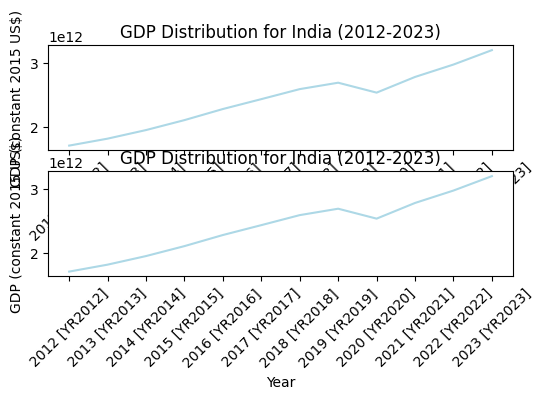

In [3]:
# List of years (columns) to plot
years = ['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
         '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', 
         '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']

# Filter for India and the series "GDP (constant 2015 US$)"
india_gdp = df[(df['Country Name'] == 'India') & (df['Series Name'] == 'GDP (constant 2015 US$)')]
india_gdpcap = df[(df['Country Name'] == 'India') & (df['Series Name'] == 'GDP per capita (constant 2015 US$)')]

# Create a new DataFrame that combines all the year columns into two columns: 'Year' and 'GDP'
gdp_melted = india_gdp.melt(id_vars=['Country Name', 'Series Name'], 
                            value_vars=years, 
                            var_name='Year', 
                            value_name='GDP')

gdp_melted_cap = india_gdpcap.melt(id_vars=['Country Name', 'Series Name'], 
                            value_vars=years, 
                            var_name='Year', 
                            value_name='GDP Capita')

# Plot the boxplot with vertical orientation
fig, axs = plt.subplots(2, figsize=(6, 3))
sns.lineplot(x='Year', y='GDP', data=gdp_melted, ax=axs[0], color='lightblue')
axs[0].set_title('GDP Distribution for India (2012-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP (constant 2015 US$)')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(x='Year', y='GDP', data=gdp_melted, ax=axs[1], color='lightblue')
axs[1].set_title('GDP Distribution for India (2012-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP (constant 2015 US$)')
axs[1].tick_params(axis='x', rotation=45)

plt.show()

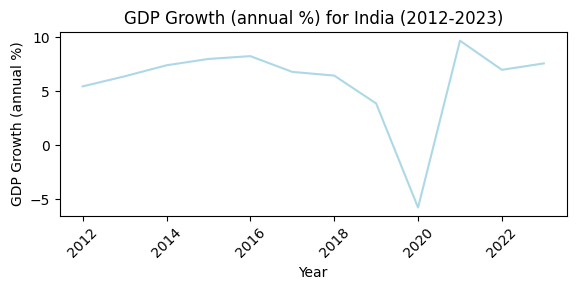

In [4]:
# List of years (columns) to plot
years = ['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
         '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', 
         '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']

# Filter for India and the series "GDP growth (annual %)"
india_gdp = df[(df['Country Name'] == 'India') & (df['Series Name'] == 'GDP growth (annual %)')]

# Create a new DataFrame that combines all the year columns into two columns: 'Year' and 'GDP'
gdp_melted = india_gdp.melt(id_vars=['Country Name', 'Series Name'], 
                            value_vars=years, 
                            var_name='Year', 
                            value_name='GDP')

# Remove the extra characters in the 'Year' column
gdp_melted['Year'] = gdp_melted['Year'].str.extract('(\d{4})').astype(int)

# Plot the line plot with fixed axis
fig, axs = plt.subplots(1, 1, figsize=(6, 3))  # Only 1 plot, so (1, 1)
sns.lineplot(x='Year', y='GDP', data=gdp_melted, ax=axs, color='lightblue')

# Setting axis labels and title
axs.set_title('GDP Growth (annual %) for India (2012-2023)')
axs.set_xlabel('Year')
axs.set_ylabel('GDP Growth (annual %)')
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


> Turns out between the per capita and total have the same pattern, so won't affect much. Let's just try to do the machine learning

# Preprocessing

## Transpose the Data

In [5]:
india_gdp = df[(df['Country Name'] == 'India') & (df['Series Name'] == 'GDP (constant 2015 US$)')]

india_GDP_transpose = pd.melt(india_gdp, 
                     id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                     var_name='Year', 
                     value_name='GDP')

india_GDP_transpose

,Country Name,Country Code,Series Name,Series Code,Year,GDP
0,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2012 [YR2012],1.704596e+12
1,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2013 [YR2013],1.813454e+12
2,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2014 [YR2014],1.947835e+12
3,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2015 [YR2015],2.103588e+12
4,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2016 [YR2016],2.277267e+12
5,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2017 [YR2017],2.432016e+12
6,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2018 [YR2018],2.588975e+12
7,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2019 [YR2019],2.689205e+12
8,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2020 [YR2020],2.533830e+12
9,India,IND,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2021 [YR2021],2.779348e+12


In [6]:
india_gdp_learn = india_GDP_transpose['GDP']

## Plot to Check Variance

In [7]:
india_gdp_learn

0     1.704596e+12
1     1.813454e+12
2     1.947835e+12
3     2.103588e+12
4     2.277267e+12
5     2.432016e+12
6     2.588975e+12
7     2.689205e+12
8     2.533830e+12
9     2.779348e+12
10    2.973542e+12
11    3.199055e+12
Name: GDP, dtype: float64

<AxesSubplot:>

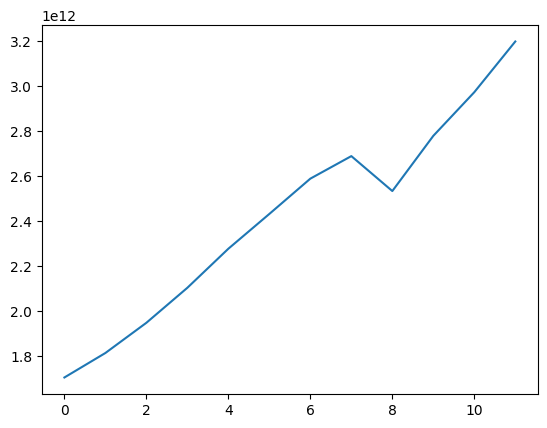

In [8]:
india_gdp_learn.plot()

<AxesSubplot:>

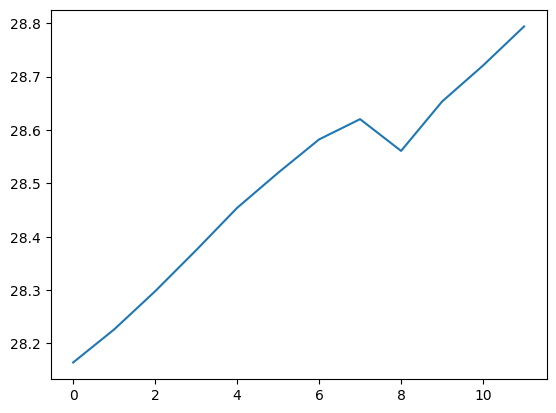

In [9]:
india_gdp_learn = np.log(india_gdp_learn)
india_gdp_learn.plot()

## Check ACF and PACF

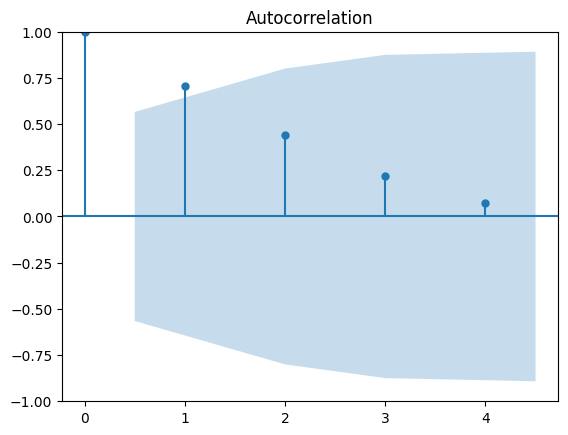

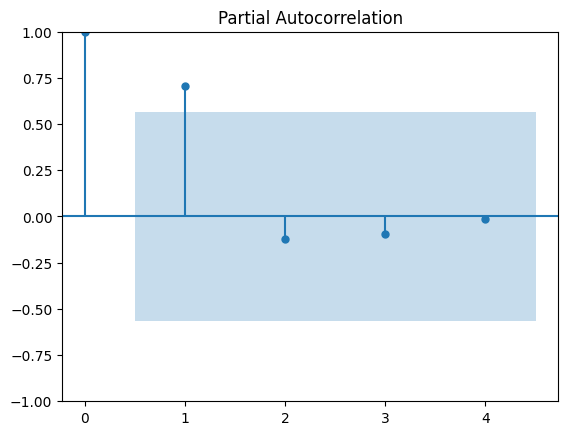

In [10]:
# Check the number of available data points
n_points = len(india_gdp_learn)

# Set the maximum lags to be a smaller value
max_lags = min(n_points // 2, 4)  # Ensure lags are a smaller number, like 4

# Plot ACF and PACF with reduced lags
acf_original = plot_acf(india_gdp_learn, lags=max_lags)
pacf_original = plot_pacf(india_gdp_learn, lags=max_lags, method='ywm')  # Use 'ywm' to avoid warning

plt.show()

In [11]:
adf_test = adfuller(india_gdp_learn)
print(f'p-value: {adf_test[1]}')

p-value: 0.9981534730436098


## Make them to Stationary (Diff)

In [12]:
ind_gdp_learn_diff = india_gdp_learn.diff().dropna()
ind_gdp_learn_diff

1     0.061905
2     0.071485
3     0.076926
4     0.079331
5     0.065745
6     0.062541
7     0.037984
8    -0.059514
9     0.092484
10    0.067538
11    0.073101
Name: GDP, dtype: float64

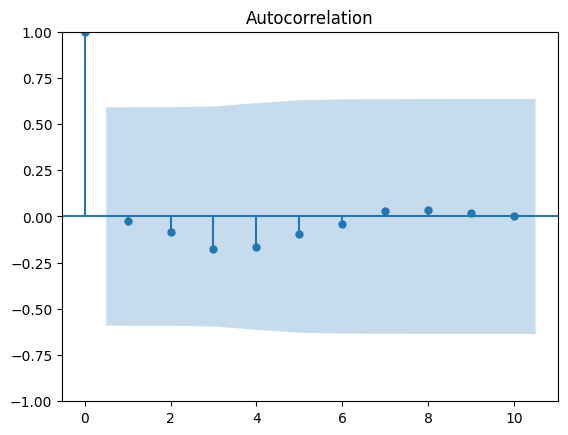

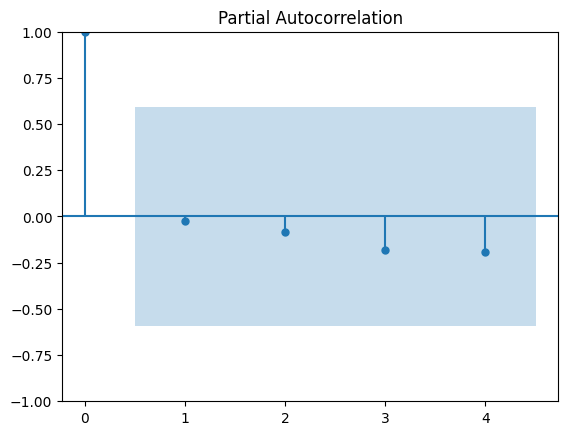

In [13]:
# Check the number of available data points
n_points = len(india_gdp_learn)

# Set the maximum lags to be a smaller value
max_lags = min(n_points // 2, 4)  # Ensure lags are a smaller number, like 4

ind_gdp_acf_diff = plot_acf(ind_gdp_learn_diff)
ind_gdp_pacf_diff = plot_pacf(ind_gdp_learn_diff,lags=max_lags ,method='ywm')

plt.show()

In [14]:
adf_test = adfuller(ind_gdp_learn_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.044893017158656096


# Model & Fit

## Fit to Arima model

In [15]:
model = ARIMA(india_gdp_learn, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  15.045
Date:                Sat, 21 Sep 2024   AIC                            -22.091
Time:                        23:24:27   BIC                            -20.151
Sample:                             0   HQIC                           -22.809
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4870      0.276    103.373      0.000      27.947      29.027
ar.L1          0.9576      0.182      5.270      0.000       0.601       1.314
ma.L1          0.4170      1.067      0.391      0.6

## Visualize the Residu

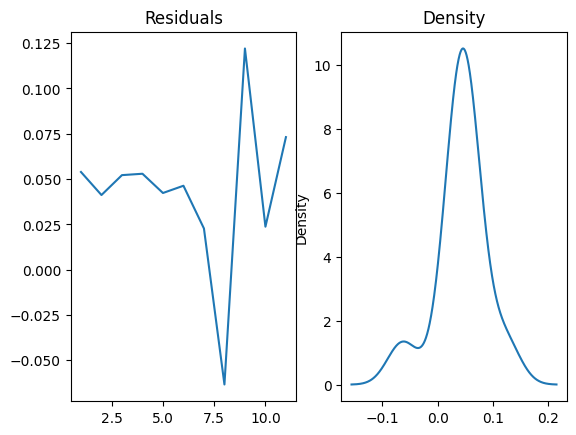

In [16]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

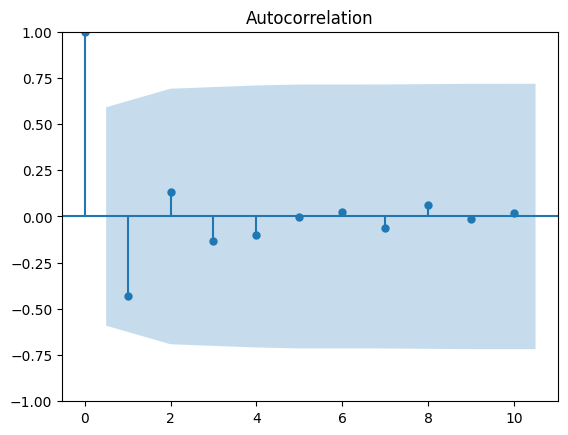

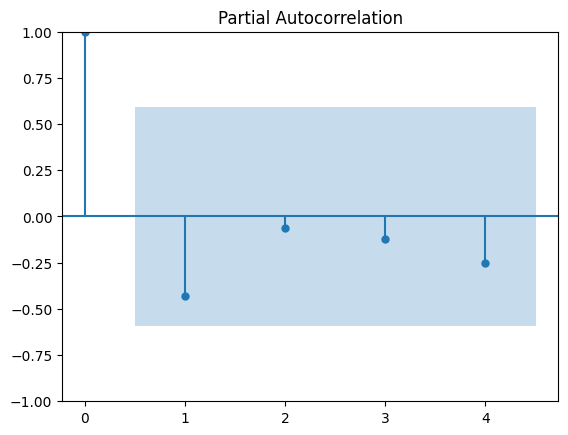

In [17]:
# Check the number of available data points
n_points = len(india_gdp_learn)

# Set the maximum lags to be a smaller value
max_lags = min(n_points // 2, 4)

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals,lags=max_lags, method='ywm')

## Visualize Result

In [24]:
india_gdp_learn

0     28.164349
1     28.226254
2     28.297739
3     28.374666
4     28.453997
5     28.519742
6     28.582283
7     28.620267
8     28.560753
9     28.653238
10    28.720775
11    28.793877
Name: GDP, dtype: float64

In [45]:
n_forecast_periods = 5  # for example, 5 future periods
forecast_test = model_fit.forecast(steps=n_forecast_periods)

In [62]:
df_awal = pd.DataFrame(india_gdp_learn)

In [65]:
df_awal

,GDP
0,28.164349
1,28.226254
2,28.297739
3,28.374666
4,28.453997
5,28.519742
6,28.582283
7,28.620267
8,28.560753
9,28.653238


In [67]:
df_forecast = pd.DataFrame(forecast_test)
df_forecast

,predicted_mean
12,28.811366
13,28.797621
14,28.784458
15,28.771853
16,28.759783


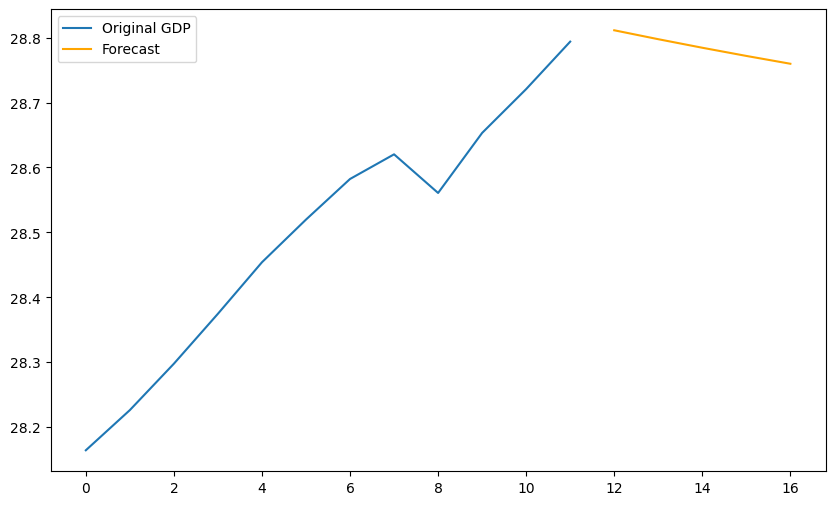

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df_awal['GDP'], label='Original GDP')
plt.plot(df_forecast, label='Forecast', color='orange')
plt.legend()
plt.show()

Haven't split train test and haven't try to see the score of model